# Esercitazione 08/04/2025 - Fisica Computazionale


# Metodo di Eulero per le equazioni differenziali ordinarie

## 1. Introduzione alle ODE

Un'equazione differenziale ordinaria (ODE) è un'equazione che lega una funzione incognita $y(t)$ a una o più sue derivate.

Esempio generale di problema di Cauchy:

$$
\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0
$$

dove $ y(t) $ è la funzione incognita e $ f(t, y) $ è una funzione data che descrive la derivata di $ y $ rispetto al tempo. La condizione iniziale e $ y(t_0) = y_0 $ definisce la condizione inizale del problema.

Le condizioni iniziali sono necessarie perché il metodo è un approccio iterativo che costruisce la soluzione passo dopo passo. Senza un valore iniziale, come $y(t_0) = y_0$, non sarebbe possibile partire da un punto definito e calcolare i valori successivi della funzione. 

Le condizioni iniziali forniscono, quindi, un punto di partenza per applicare la formula di aggiornamento iterativa. Inoltre, senza queste informazioni, il processo numerico non avrebbe alcun riferimento da cui iniziare l'integrazione nel tempo. 

In sintesi, **le condizioni iniziali sono fondamentali per definire univocamente il comportamento della soluzione.**

---

## 2. Perché servono i metodi numerici?

Molte equazioni differenziali **non ammettono soluzioni esplicite**. Per questo motivo, utilizziamo metodi **numerici** per **approssimare** la soluzione.

Il più semplice tra questi è il **metodo di Eulero**.


---

## 3. Il metodo di Eulero

L'idea fondamentale del **metodo di Eulero** è quella di **seguire la pendenza** della funzione data dalla derivata, cioè dalla funzione $ f(t, y) $, per **costruire la soluzione passo dopo passo**. In altre parole, il metodo si basa sull'approssimazione del valore di $ y(t) $ in punti successivi a partire dal valore iniziale $ y_0 $, utilizzando la derivata (pendenza) della funzione al punto corrente.

Supponiamo di voler calcolare $ y(t) $ per un tempo successivo $ t_{n+1} $ dato un tempo iniziale $ t_n $ e il valore di $ y(t_n) $. 
In un piccolo intervallo di tempo, possiamo assumere che la variazione di $ y(t) $ sia lineare e proporzionale alla derivata della funzione nel punto corrente. 

Se discretizziamo il processo in intervalli temporali di larghezza finita $h$ possiamo scrivere:

$$
\frac{dy}{dt} \approx \frac{y(t_{n+1}) - y(t_n)}{h} =  f(t_n, y(t_n))
$$

Pertanto, la formula del metodo di Eulero è:

$$
y(t_{n+1}) = y(t_n) + h \cdot f(t_n, y(t_n))
$$

Dove:
- $ t_n $ è il tempo corrente.
- $ y(t_n) $ è il valore della funzione al tempo $ t_n $.
- $ h $ è il passo temporale, cioè la distanza tra i tempi successivi $ t_{n+1} = t_n + h $.
- $ f(t_n, y(t_n)) $ è la derivata della funzione al tempo $ t_n $, che ci dice come cambia la funzione in quel punto.


### 4. **Interpretazione della formula**

La formula sopra dice che, per calcolare il valore di $ y $ al tempo $ t_{n+1} $, partiamo dal valore noto di $ y(t_n) $ e aggiungiamo una **variazione** che dipende dalla pendenza (derivata) della funzione in quel punto. La pendenza è data da $ f(t_n, y(t_n)) $, e moltiplicandola per il passo temporale $ h $, otteniamo quanto cambia $ y(t) $ in quell'intervallo di tempo.

L'idea è che, con l'approssimazione di Eulero, ogni passo successivo è costruito sulla base della pendenza al punto corrente, come se si seguisse una "retta tangente" alla curva che rappresenta la soluzione dell'ODE.

## 5. Esempio pratico, soluzione numerica di un'ODE e analisi dell'errore

Consideriamo il seguente problema:

$$
\frac{dy}{dt} = y, \quad y(0) = 1
$$

La **soluzione esatta** è: $y(t) = e^t$


In questo esercizio applichiamo il **metodo di Eulero** per risolvere numericamente la seguente equazione differenziale:

Vogliamo:
- Calcolare la soluzione numerica usando il metodo di Eulero.
- Confrontare la soluzione numerica con quella esatta.
- Calcolare e rappresentare graficamente l'**errore**:

$$
\text{errore}(t) = y_{\text{numerico}}(t) - y_{\text{esatto}}(t)
$$

### Applichiamo Eulero con $h = 0.1$

- Passo 0: $y_0 = 1$
- Passo 1: $y_1 = y_0 + 0.1 \cdot y_0 = 1 + 0.1 \cdot 1 = 1.1$
- Passo 2: $y_2 = y_1 + 0.1 \cdot y_1 = 1.1 + 0.1 \cdot 1.1 = 1.21$
- Passo 3: $y_3 = y_2 + 0.1 \cdot y_2 = 1.21 + 0.1 \cdot 1.21 = 1.331$

Confronto con la soluzione esatta in $t = 0.3$:

$$
e^{0.3} \approx 1.3499
$$

Calcoliamo l'errore 
<details>
  <summary> Mostra la Soluzione</summary>

Errore: $\approx 1.3499 - 1.331 = 0.0189$

## 6. Errore del metodo

Il metodo di Eulero ha **errore globale di ordine 1**, ovvero:

$$
\text{Errore} \sim \mathcal{O}(h)
$$

Riducendo $h$, si migliora la precisione.

## Pseudocodice del Programma
1. Definisci la funzione derivata:
- f(t, y) = y

2. Inizializza i parametri:
- t0 ← tempo iniziale
- y0 ← condizione iniziale
-  h ← passo temporale
-  N ← numero di passi da effettuare

3. Crea le liste dei risultati:
- t_values ← lista dei tempi
- y_values ← lista dei valori numerici y(t)

4. Applica il metodo di Eulero:
- per n = 0 a N - 1:
    - t ← ultimo elemento di t_values
    - y ← ultimo elemento di y_values
    - y_next ← y + h * f(t, y)             // formula di Eulero
    - aggiungi (t + h) a t_values
    - aggiungi y_next a y_values

5. Converte t_values e y_values in array (per operazioni numeriche)

6. Calcola la soluzione esatta:
- y_exact ← exp(t_values)

7. Calcola l'errore:
- errore ← y_values - y_exact

8. Grafici:
- Primo grafico: confronto tra soluzione numerica e soluzione esatta
- Secondo grafico: errore in funzione del tempo

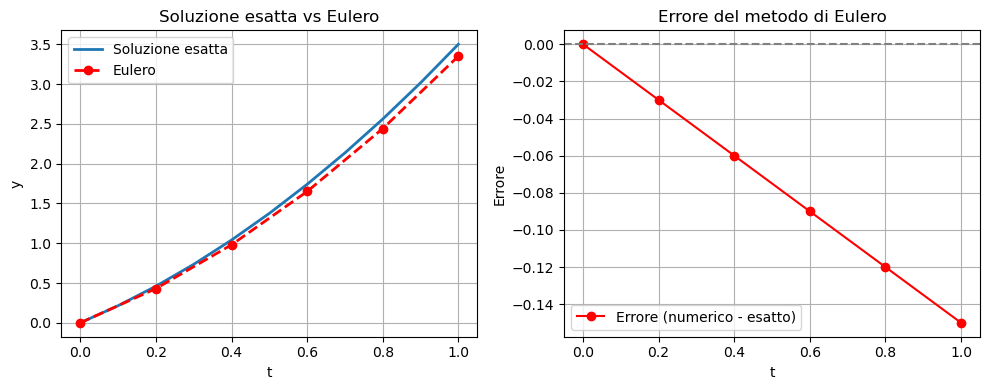

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Definizione della funzione
def f(t, y):
    return 3*t+2

# Condizione iniziale
t0 = 0
y0 = 0
h = 0.1
N = np.ceil(1.0/h)

plt_pnts = int(N/5)

# Vettori per i risultati
t_values = [t0]
y_values = [y0]

# Metodo di Eulero
for n in range(int(N)):
    t = t_values[-1]
    y = y_values[-1]
    y_next = y + h * f(t, y)
    t_values.append(t + h)
    y_values.append(y_next)

# Conversione in array per comodità
t_values = np.array(t_values)
y_values = np.array(y_values)

# Soluzione esatta
y_exact = ((3.0/2.0)*t_values**2 + 2*t_values)

# Calcolo errore
errore = y_values - y_exact

# Grafico della soluzione
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(t_values, y_exact, '-',label='Soluzione esatta', linewidth=2)
plt.plot(t_values[::plt_pnts], y_values[::plt_pnts], 'ro--', label='Eulero', linewidth=2)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Soluzione esatta vs Eulero')
plt.legend()
plt.grid(True)

# Grafico dell'errore
plt.subplot(1, 2, 2)
plt.plot(t_values[::plt_pnts], errore[::plt_pnts], 'r-o', label='Errore (numerico - esatto)')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('t')
plt.ylabel('Errore')
plt.title('Errore del metodo di Eulero')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Algoritmo per il Metodo di Eulero

Input:
- f(t, y)     → funzione che definisce l'ODE: dy/dt = f(t, y)
- t0          → tempo iniziale
- y0          → valore iniziale della soluzione: y(t0) = y0
- h           → passo temporale (step size)
- N           → numero di passi da effettuare (oppure tempo finale tf)

Output:
    Lista di valori (t_n, y_n) approssimati della soluzione

Algoritmo:

1. Inizializza:
    t ← t0
    y ← y0
    crea una lista vuota T per i tempi
    crea una lista vuota Y per i valori di y

2. Salva i valori iniziali:
- aggiungi t a T
- aggiungi y a Y

3. Ciclo per N passi:
    per n = 1 a N:
- calcola f_n ← f(t, y)
- calcola y ← y + h * f_n         // formula di Eulero
- calcola t ← t + h
- aggiungi t a T
- aggiungi y a Y

4. Restituisci le liste T e Y come soluzione approssimata

Fine


## Esercizi

### 1. Esponenziale decrescente

$$
\frac{dy}{dt} = -2y, \quad y(0) = 1
$$

**Soluzione esatta:**

$$
y(t) = e^{-2t}
$$

---

### 2. Equazione lineare non omogenea

$$
\frac{dy}{dt} = 3t + 2, \quad y(0) = 0
$$

**Soluzione esatta:**

$$
y(t) = \frac{3}{2}t^2 + 2t
$$

---

### 3. Equazione quadratica in $y$

$$
\frac{dy}{dt} = y^2, \quad y(0) = 1
$$

**Soluzione esatta:**

$$
y(t) = \frac{1}{1 - t}, \quad \text{valida per } t < 1
$$

Attenzione: la soluzione **diverge** in $t = 1$.

---

### 4. Equazione sinusoidale

$$
\frac{dy}{dt} = \cos(t), \quad y(0) = 0
$$

**Soluzione esatta:**

$$
y(t) = \sin(t)
$$

---

### 5. Decadimento forzato

$$
\frac{dy}{dt} = -y + \sin(t), \quad y(0) = 0
$$

**Soluzione esatta:**

$$
y(t) = \frac{1}{2} \left( \sin(t) - \cos(t) + e^{-t} \right)
$$

---

### 6. Sistema oscillante (Avanzato)

#### Equazione dell'Oscillatore Armonico

Per un **oscillatore armonico**, la posizione della particella (o del blocco legato alla molla) $ y(t) $ rispetto al tempo segue una legge di moto che dipende dalla forza elastica. La forza che agisce su una particella di massa $ m $, attaccata a una molla con costante elastica $ k $, è data dalla **legge di Hooke**:

$$
F = -k y(t)
$$

Secondo la **seconda legge di Newton**, la forza è anche uguale al prodotto della massa e dell'accelerazione:

$$
F = m \frac{d^2y}{dt^2}
$$

Eguagliando le due espressioni:

$$
m \frac{d^2y}{dt^2} = -k y(t)
$$

Dividendo entrambi i membri per la massa $ m $, otteniamo l'equazione differenziale che descrive il moto di un oscillatore armonico:

$$
\frac{d^2y}{dt^2} = -\frac{k}{m} y(t)
$$

Dove $ \frac{k}{m} $ è una costante che dipende dalla molla e dalla massa. La frequenza angolare $ \omega $ è definita come:

$$
\omega^2 = \frac{k}{m}
$$

Quindi l'equazione diventa:

$$
\frac{d^2y}{dt^2} = -\omega^2 y(t)
$$

#### Sistema di Equazioni di Primo Ordine

Per risolvere questa equazione con il metodo di Eulero o altri metodi numerici, possiamo trasformarla in un sistema di equazioni di primo ordine. Introduciamo una nuova variabile $ z(t) $ che rappresenta la **velocità** della particella, cioè:

$$
z(t) = \frac{dy}{dt}
$$

Ora possiamo scrivere il sistema di equazioni del primo ordine come segue:

1. La velocità $ z(t) $ è la derivata prima della posizione:

$$
\frac{dy}{dt} = z(t)
$$

2. La velocità $ z(t) $ è la derivata della velocità, che corrisponde all'accelerazione. Dalla legge di Hooke, sappiamo che l'accelerazione è proporzionale e opposta alla posizione:

$$
\frac{dz}{dt} = -\omega^2 y(t)
$$

#### Sistema di Equazioni del Primo Ordine

Ora possiamo riscrivere il sistema completo come segue:

$$
\begin{cases}
\frac{dy}{dt} = z(t) \\
\frac{dz}{dt} = -\omega^2 y(t)
\end{cases}
$$

Queste due equazioni descrivono il moto di un oscillatore armonico, dove:

- $ y(t) $ è la **posizione** della particella,
- $ z(t) $ è la **velocità** della particella nel tempo.

#### Condizioni Iniziali

Le condizioni iniziali per questo sistema sono tipicamente date dalla posizione iniziale $ y(0) $ e dalla velocità iniziale $ z(0) $. Ad esempio, nel caso dell'esercizio fornito:

- $ y(0) = 0 $ (la particella parte dalla posizione di equilibrio),
- $ z(0) = 1 $ (la velocità iniziale della particella è 1).

Il sistema di equazioni che otteniamo descrive un oscillatore armonico, in cui la posizione e la velocità evolvono nel tempo. Queste equazioni sono lineari e accoppiate, e possono essere risolte numericamente utilizzando il **metodo di Eulero** o altri metodi numerici per ottenere l'evoluzione nel tempo delle variabili $ y(t) $ e $ z(t) $.

per semplicità imponiamo $\omega^2 = 1$

$$
\begin{cases}
\frac{dy}{dt} = z \\
\frac{dz}{dt} = -y
\end{cases}, \quad y(0) = 0, \ z(0) = 1
$$

**Soluzione esatta:**

$$
y(t) = \sin(t), \quad z(t) = \cos(t)
$$

---


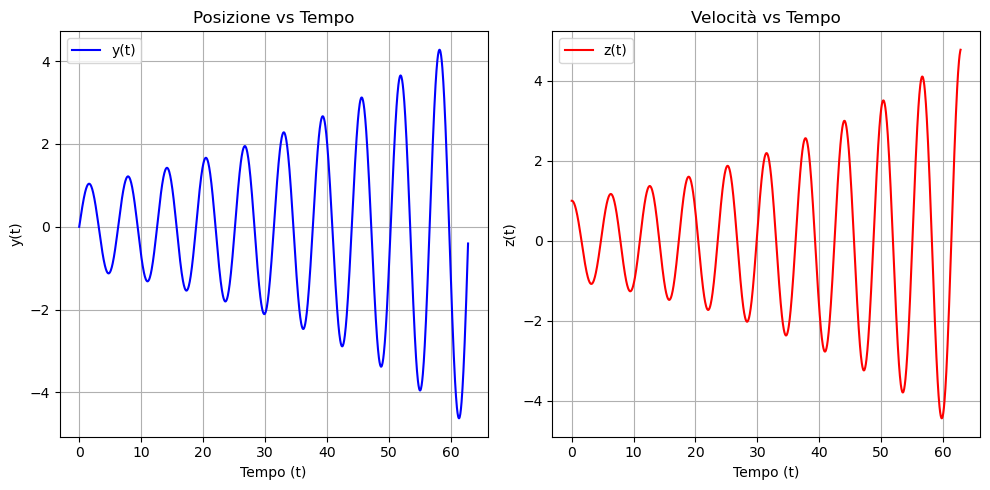

In [18]:
# ESERCIZIO 6 Sistema oscillante

import numpy as np
import matplotlib.pyplot as plt

# Definizione del sistema
def f(t, y, z, omega):
    dydt = z
    dzdt = -(omega**2) * y
    return dydt, dzdt

# Parametri
t0 = 0       # Tempo iniziale
y0 = 0       # Condizione iniziale per y
z0 = 1       # Condizione iniziale per z
omega = 1.0  # Frequenza angolare
h = 0.05     # Passo temporale
T = 20*np.pi       # Tempo finale
N = int(T / h)  # Numero di passi

# Vettori per i risultati
t_values = np.linspace(t0, T, N+1)
y_values = np.zeros(N+1)
z_values = np.zeros(N+1)

# Inizializzazione delle condizioni iniziali
y_values[0] = y0
z_values[0] = z0

# Metodo di Eulero
for n in range(N):
    t = t_values[n]
    y = y_values[n]
    z = z_values[n]
    
    dydt, dzdt = f(t, y, z, omega)
    
    # Applica il metodo di Eulero per aggiornare y e z
    y_values[n+1] = y + h * dydt
    z_values[n+1] = z + h * dzdt

# Grafico delle soluzioni
plt.figure(figsize=(10, 5))

# Grafico della posizione y(t)
plt.subplot(1, 2, 1)
plt.plot(t_values, y_values, label='y(t)', color='b')
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.title('Posizione vs Tempo')
plt.grid(True)
plt.legend()

# Grafico della velocità z(t)
plt.subplot(1, 2, 2)
plt.plot(t_values, z_values, label='z(t)', color='r')
plt.xlabel('Tempo (t)')
plt.ylabel('z(t)')
plt.title('Velocità vs Tempo')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## Instabilità numerica

Il metodo di Eulero per l'oscillatore armonico può introdurre un **instabilità numerica** che si manifesta come una crescita continua dell'errore nel tempo (l'ampiezza della soluzione numerica aumenta). Per evitare questo problema, possiamo scegliere un metodo che sia più stabile rispetto al metodo di Eulero e integrare le due equazioni separatamente, aggiornando prima $y(t)$ e poi $z(t)$.

Il metodo di Eulero, infatti, è noto per essere numericamente instabile, specialmente nei sistemi come l'oscillatore armonico. Un approccio più stabile sarebbe il metodo di Heun (o Eulero migliorato)

### Metodo di Heun (Euler Migliorato)

Il **metodo di Heun**, o **Euler migliorato**, è una versione più precisa del metodo di Eulero, che risolve il problema della crescita dell'errore numerico, specialmente nei sistemi oscillanti. La sua formula si basa sull'idea di correggere la pendenza calcolata con il metodo di Eulero utilizzando una media tra la pendenza iniziale e quella finale del passo.

In altre parole lo schema di Heun è un metodo **predictor-corrector** in cui si effettua prima una previsione del valore della soluzione utilizzando il metodo di Eulero (predittore), e successivamente si corregge questa previsione prendendo la media tra la pendenza calcolata al passo iniziale e quella al passo finale (correttore), migliorando così la precisione dell'integrazione.

### Formula del Metodo di Heun

Per un sistema di equazioni differenziali del tipo:

$$
\frac{dy}{dt} = f_1(t, y, z) \\
\frac{dz}{dt} = f_2(t, y, z)
$$

Il passo del metodo di Heun è il seguente:

1. Calcolare la previsione iniziale con il metodo di Eulero:

$$
y_{n+1}^{(Eulero)} = y_n + h \cdot f_1(t_n, y_n, z_n)
$$

$$
z_{n+1}^{(Eulero)} = z_n + h \cdot f_2(t_n, y_n, z_n)
$$

2. Calcolare i valori predetti per $y$ e $z$ nel passo successivo usando la previsione di Eulero:

$$
y_{\text{predict}} = y_n + h \cdot f_1(t_n + h, y_n + h f_1(t_n, y_n, z_n), z_n + h f_2(t_n, y_n, z_n))
$$

$$
z_{\text{predict}} = z_n + h \cdot f_2(t_n + h, y_n + h f_1(t_n, y_n, z_n), z_n + h f_2(t_n, y_n, z_n))
$$

3. Correggere la previsione con la media delle pendenze calcolate:

$$
y_{n+1} = y_n + \frac{h}{2} \left[ f_1(t_n, y_n, z_n) + f_1(t_n + h, y_n + h f_1(t_n, y_n, z_n), z_n + h f_2(t_n, y_n, z_n)) \right]
$$

$$
z_{n+1} = z_n + \frac{h}{2} \left[ f_2(t_n, y_n, z_n) + f_2(t_n + h, y_n + h f_1(t_n, y_n, z_n), z_n + h f_2(t_n, y_n, z_n)) \right]
$$

Questa correzione aiuta a ridurre l'errore rispetto al semplice metodo di Eulero, che tende a causare un accumulo di errore nei sistemi oscillanti come l'oscillatore armonico.

## Vantaggi del Metodo di Heun

- **Migliore precisione**: Il metodo di Heun riduce l'errore rispetto al metodo di Eulero, in particolare in sistemi come l'oscillatore armonico.
- **Maggiore stabilità**: Questo approccio è più stabile rispetto al metodo di Eulero per sistemi in cui le soluzioni oscillano.

## Errore nel Metodo di Eulero

Nel **metodo di Eulero**, l'errore cresce tipicamente in modo lineare con l'incremento del passo $h$. In particolare, l'errore nel calcolo della soluzione numerica per ogni passo si accumula in modo crescente, portando a una discrepanza maggiore con la soluzione esatta man mano che il tempo avanza. Il **metodo di Heun**, invece, **grazie alla correzione, riduce l'errore complessivo e ne limita la crescita**.

## Conclusioni

Il metodo di Heun è una scelta efficace quando si ha bisogno di un'integrazione numerica più precisa e stabile rispetto al metodo di Eulero. Tuttavia, se l'errore è ancora inaccettabile, si può considerare l'adozione di metodi ancora più avanzati.

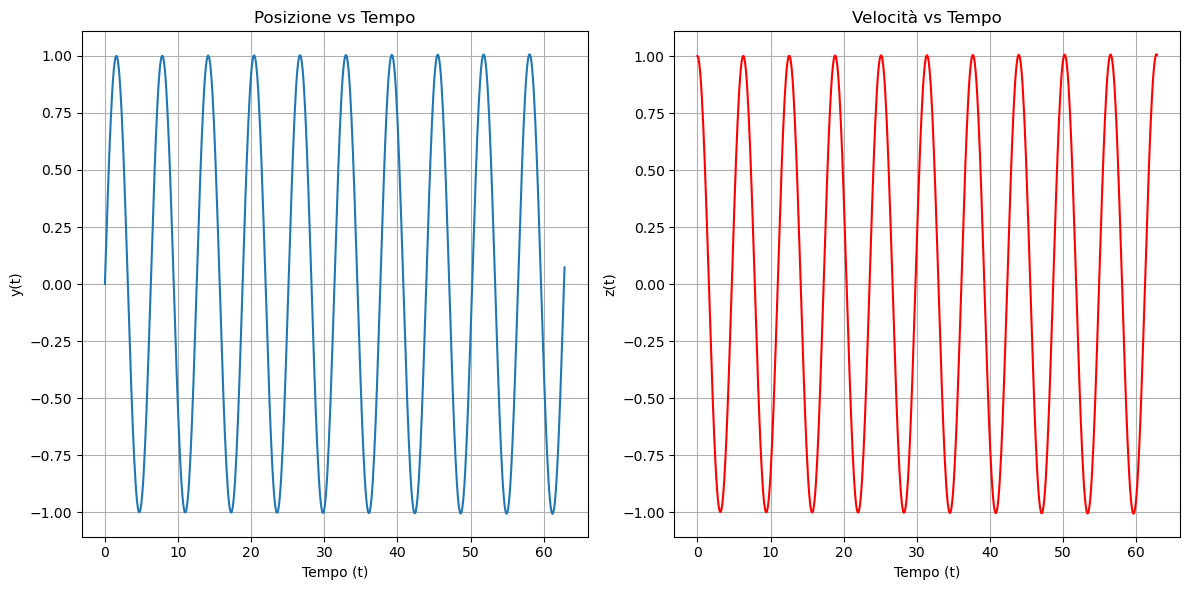

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definizione delle equazioni
def f_y(z):
    return z

def f_z(y,omega):
    return -(omega**2)*y

# Condizioni iniziali
t0 = 0
y0 = 0
z0 = 1
h = 0.1  # Passo temporale
T = 20*np.pi    # Tempo finale
N = int(T / h)  # Numero di passi
omega = 1.0  # Frequenza angolare

# Vettori per i risultati
t_values = np.linspace(t0, T, N+1)
y_values = np.zeros(N+1)
z_values = np.zeros(N+1)

# Condizioni iniziali
y_values[0] = y0
z_values[0] = z0

# Metodo di Heun (Euler Migliorato)
for n in range(N):
    y = y_values[n]
    z = z_values[n]
    
    # Calcolare i valori predetti per y e z (Eulero)
    y_predict = y + h * f_y(z)
    z_predict = z + h * f_z(y,omega)
    
    # Correggere con i valori mediati
    y_values[n+1] = y + h * 0.5 * (f_y(z) + f_y(z_predict))
    z_values[n+1] = z + h * 0.5 * (f_z(y,omega) + f_z(y_predict,omega))

# Grafico dei risultati
plt.figure(figsize=(12, 6))

# Grafico di y(t)
plt.subplot(1, 2, 1)
plt.plot(t_values, y_values, label='y(t)')
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.title('Posizione vs Tempo')
plt.grid(True)

# Grafico di z(t)
plt.subplot(1, 2, 2)
plt.plot(t_values, z_values, label='z(t)', color='r')
plt.xlabel('Tempo (t)')
plt.ylabel('z(t)')
plt.title('Velocità vs Tempo')
plt.grid(True)

plt.tight_layout()
plt.show()



## **Esercizio 1.**

Una navetta di massa $100$ tonnellate decolla verticalmente dalla Terra con una spinta costante di 2 megaNewton data dai propulsori, attivi per 4 minuti. Assumi che la gravità sia costante e pari a $9.8\ m/s^2,$ che sia trascurabile la resistenza dell’aria, e che la massa della navicella non cambi nel tempo. 
* A che distanza dal suolo si trova quando si esaurisce la spinta dei propulsori? 
* Qual è la velocità finale? 

Calcola i risultati analiticamente e numericamente (metodo di Eulero).

***Competenze richieste**: moto uniformemente accelerato in 1D, algoritmo Eulero.*

---

#### **Hard mode**

* Ripeti la simulazione dell'Esercizio 1 usando la legge di gravitazione universale e confronta i risultati con quelli ottenuti a gravità costante. Dati extra necessari: $M_T=6.0\times 10^{24},G=6.7\times 10^{-11}$.
* Finora abbiamo fatto un'approssimazione molto forte! In verità nei decolli dei velivoli spaziali la massa diminuisce velocemente, perché viene continuamente bruciato ed espulso propellente, che costituisce gran parte della massa totale. Modifica il codice per simulare la perdita di 400 kg di propellente al secondo nel corso dei 4 minuti di spinta. 

***Competenze richieste**: algoritmo Eulero, legge di gravitazione universale, seconda legge di Newton ($F=ma$).*


# Soluzioni

## **Es. 1**

L'accelerazione può essere calcolata dalla seconda legge di Newton:
$$a_{prop}=\frac{F_{prop}}{m}=\frac{2\times 10^6}{10^{5}}=20\ m/s^2$$
$$a=-g+a_{prop}=-9.8+20=10.2\ m/s^2$$
Dalle formule del moto uniformemente accelerato possiamo trovare distanza e velocità finali:
$$v(t)=v_0+at$$
$$v(240)=0+10.2\cdot 240=2448\ m/s\approx 2.4\times 10^3\ m/s$$
$$s(240)=0.5\cdot 10.2 \cdot 240^2=293760\ m\approx 2.9\times 10^5\ m$$


La distanza finale è 54797543 m
La velocità finale è 456646 m/s


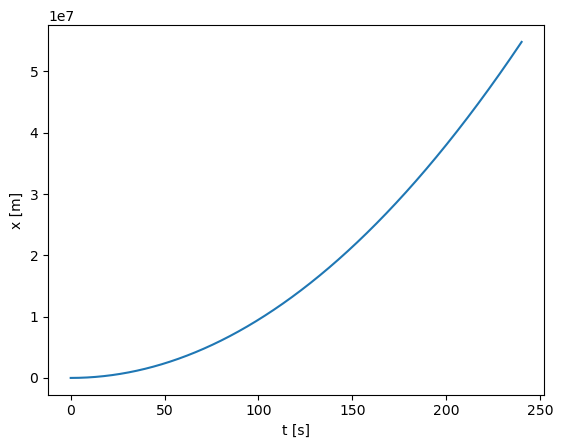

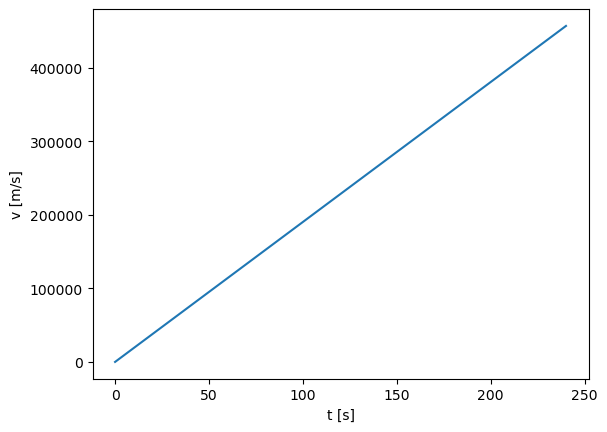

In [22]:
import numpy as np
import matplotlib.pyplot as plt

m = 100e3
F_prop = 2e8
g = 98.1
dt = 0.1
M_T = 6.0E24           # massa Terra 
R_T = 6400 * 1000              # raggio Terra 
G = 6.7E-11            # costante gravitazione universale 
flusso_propellente = 400      # [kg/s]

ts = [0]
xs = [0]
vels = [0]
accs = [-g+F_prop/m]

t_end = 240   # la durata della simulazione

# Metodo di Eulero:
while ts[-1] <= t_end:
    v = vels[-1] + accs[-1] * dt
    x = xs[-1] + vels[-1] * dt

    # Memorizziamo i risultati
    ts.append(ts[-1] + dt)
    xs.append(x)
    vels.append(v)
    # scommenta le righe qui sotto per soluzione hard mode
    # m -= flusso_propellente * dt          # massa non costante
    # F_T = -G*m*M_T / (x+R_T)**2           # gravità Terra non costante
    # accs.append( (-F_T+F_prop)/m )        # tengo traccia dell'accelerazione

plt.figure(1)
plt.plot(ts,xs)
plt.xlabel('t [s]')
plt.ylabel('x [m]')

plt.figure(2)
plt.plot(ts,vels)
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')


print(f'La distanza finale è {xs[-1]:.0f} m')
print(f'La velocità finale è {vels[-1]:.0f} m/s')



## **Esercizio 2. Moto armonico**

Una molla di costante elastica $k=5\ N/cm$ è disposta orizzontalmente su un piano e fissata ad una massa $m$ di 200 grammi, libera di muoversi senza attrito sul piano.
* Calcola il periodo del moto della massa nell'approssimazione di piccole oscillazioni. 
* Simula numericamente il moto del sistema: fai un grafico di posizione, velocità e accelerazione e verifica che il periodo delle oscillazioni sia coerente con il risultato analitico (cosa succede se provi valori diversi della posizione iniziale $x_0$?). 

***Competenze richieste**: legge di Hooke, moto armonico, algoritmo Eulero.*

---

#### **Hard mode**

* Ripeti la simulazione considerando la massa immersa in un fluido, per i seguenti valori del coefficiente di attrito viscoso:
    - b = 5 Ns/m
    - b = 20 Ns/m
    - b = 100 Ns/m

***Competenze richieste**: attrito viscoso, seconda legge di Newton ($F=ma$).*


## Soluzione Es. 2

* Dopo aver convertito i dati in unità SI, la pulsazione del moto armonico è data dalla relazione:
$$\omega=\sqrt{\frac{k}{m}}=\sqrt{\frac{5\cdot 100}{0.2}}=50\ \mathrm{rad/s}$$
da cui possiamo ricavare il periodo ricordando che $\omega=2\pi f$ e $f=1/T$:
$$f=\frac{\omega}{2\pi }=7.96\ \mathrm{Hz}$$
$$ T=\frac{1}{f}=\frac{1}{7.96}=0.126\ s$$

* Per simularne il moto con Eulero è sufficiente sostituire l'espressione della legge di Hooke nel calcolo della forza. Se impostiamo la durata della simulazione a 1 secondo, basta contare il numero dei picchi e verificare che sia compatibile con la frequenza trovata $f\approx 8\ \mathrm{Hz}$.

#### Hard mode

Nel caso dell'attrito viscoso, andiamo ad aggiungere il termine smorzante alla forza elastica per ognuno dei valori richiesti.

Nel codice qua sotto sono riportati i risultati sia per il caso senza attrito (non smorzato, che corrisponde al caso $b=0$) che quelli con attrito viscoso. I 3 coefficienti dati corrispondono ai **3 diversi regimi** di un moto armonico smorzato: 
* sottosmorzamento ($b<2m\omega$), 
* smorzamento critico ($b=2m\omega$),
* sovrasmorzamento ($b>2m\omega$).

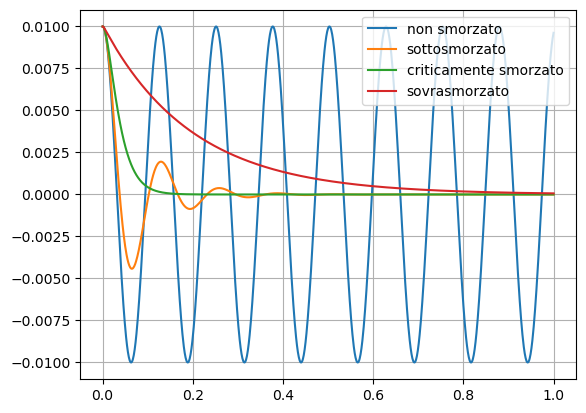

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 0.01
k = 5 * 100
m = 0.2
dt = 0.001
coefficienti_attrito_viscoso = [0, 5, 20, 100]
modalita_pendolo = ['non smorzato', 'sottosmorzato', 'criticamente smorzato', 'sovrasmorzato']

t_max = 1                 # stabiliamo la durata dell'esperimento

# per ognuno dei coefficienti attrito richiesti:
for b, mode in zip(coefficienti_attrito_viscoso, modalita_pendolo):
    ts = [0]
    xs = [x0]
    vels = [0]
    accs = [-k*x0]

    # Metodo di Eulero:
    while ts[-1] < t_max:
        v = vels[-1] + accs[-1]*dt
        x = xs[-1] + v*dt

        # calcolo forza 
        F_hooke = -k*x
        F_viscoso = -b*v
        F = F_hooke + F_viscoso

        # Memorizziamo i risultati
        ts.append(ts[-1] + dt)
        xs.append(x)
        vels.append(v)
        accs.append(F/m)

    plt.plot(ts,xs, label=mode)

plt.legend(loc=1)
plt.grid()



## **Esercizio 3 - Salto con gli sci**

Lo sport olimpico del [salto con gli sci](https://youtu.be/ngddfxog-yw?si=thhtr6_UnXo43MxQ&t=442) consiste nel prendere velocità scendendo una rampa inclinata ed effettuare uno stacco per atterrare il più lontano possibile.

Considera una sciatrice di 55 kg che, dandosi una spinta per uscire dai blocchi, parte con una velocità iniziale di 2.0 m/s. Il punto di partenza della rampa è ad un'altezza di 60 metri rispetto al punto di stacco e la rampa (rettilinea) è lunga 100 m. Alla fine della rampa inclinata percorre un altro tratto orizzontale, lungo 10 m, prima di saltare. Lungo tutto il percorso, il coefficiente di attrito tra gli sci e la neve è $\mu=0.050$. Trascura l'attrito dell'aria.

1. Con quale velocità arriva al salto la sciatrice?

Per rendere l'atterraggio più sicuro, la pista di atterraggio non è piatta ma ha equazione $y=-\frac{1}{2}x$ (assumendo che il punto di salto sia nell'origine).

2. A quale distanza dal punto in cui ha saltato atterra la sciatrice? Usa l'equazione della traiettoria del moto del proiettile.

**Competenze**: piano inclinato, attrito radente, moto del proiettile.

---

#### **Hard mode**

* Scrivi il codice per trovare numericamente il risultato di (2). Come velocità iniziale usa la velocità di salto calcolata nel punto (1). Il punto di atterraggio va trovato utilizzando Eulero e imponendo la giusta condizione di uscita dal ciclo `for`. Puoi modificare il codice per il moto del proiettile nel [notebook sui moti 2D](https://github.com/nicolalogullo/27005227-fisica-computazionale/blob/main/Esercizi_moto2D_soluzioni.ipynb) (esercizio 4).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# DIAGRAMMA DELL'ESERCIZIO
plt.plot([-90,-10,0],[60,0,0], label='rampa', color='black')
plt.plot([0,120],[0,-60], label='pista atterraggio', color='blue')
plt.plot(-90,60,'bs', markersize=10, label='blocchi di partenza')
xs=np.linspace(0,100,100)
yspar=-xs**2/200        # non è la vera soluzione
plt.plot(xs,yspar,'r--',label='traiettoria volo')
plt.axis('equal')
plt.legend()

# Soluzione 

Innanzitutto dobbiamo capire qual è la risultante delle forze agenti sul corpo della sciatrice nel tratto inclinato della rampa. Le componenti perpendicolari al piano, ovvero la componente perpendicolare della forza peso e la reazione vincolare, come al solito si bilanciano. 

C'è invece una forza netta agente in direzione parallela alla rampa, e data dalla differenza tra componente parallela della forza peso e forza di attrito radente dinamico (siccome la sciatrice era già in movimento non dobbiamo preoccuparci dell'attrito statico!):
$$ F_1 = mg \sin\theta - \mu mg\cos\theta $$
Possiamo calcolare $\theta$ usando le funzioni goniometriche inverse:
$$\theta=\arcsin(60/100) = 37°$$
**oppure** visto che ci servono soltanto seno e coseno possiamo ricavarli usando le relazioni goniometriche:
$$\sin\theta=\frac{60}{100}=0.6\quad , \cos\theta=\sqrt{1-\sin^2\theta}=0.8$$

In ogni caso da $F_1$ risulta un accelerazione:
$$ a_1 = \frac{F_1}{m} = g (\sin\theta - \mu\cos\theta) = 5.5\ m/s^2$$
che come vediamo non dipende dalla massa dell'atleta.

Calcoliamo la velocità alla fine della rampa inclinata $v_1$ usando la relazione tra spazio e velocità nel moto uniformemente accelerato:
$$v^2 = v_0^2 + 2\ as $$
$$\Rightarrow v_1^2 = 2^2 + 2\cdot 5.5 \cdot 100=1104\ (m/s)^2$$

Per il breve tratto orizzontale facciamo lo stesso ragionamento ma stavolta l'unica forza che agisce è quella di attrito e la forza normale è tutta la forza peso:
$$ a_2 = \frac{F_2}{m} = - \mu g = - 0.5\ m/s^2 $$
quindi possiamo ricavare la velocità finale di salto $v_2$ come:
$$v_2^2 = v_1^2 + 2\ a_1s_1 = 1104 - 2\cdot 0.5 \cdot 10=1094\ (m/s)^2$$
$$v_2=33\ m/s$$

Per trovare il punto di atterraggio, possiamo imporre l'intersezione tra l'equazione della traiettoria parabolica del proiettile (ricordando che l'angolo di lancio $\alpha$ è nullo l'espressione si semplifica): 
$$y(x) = \cancel{x \tan(\alpha)} - \frac{g}{2v_0^2 \cancel{\cos^2(\alpha)}} x^2$$

e l'equazione della retta che descrive la pista di atterraggio data nel testo, ottenendo:
$$ \frac{9.81}{2\cdot 33^2} x^2 = -\frac{1}{2}x$$
a parte la soluzione banale $x=0$, otteniamo 
$$x_{att}=\frac{1094}{9.81}=112\ m\approx 1.1 \times 10^2\ m$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from funzioni_fis_comp import *    # la nostra libreria personalizzata

# dati
x0, y0 = 0, 0       # [m]
v0x, v0y = 33, 0  # [m/s]
ax, ay = 0, -9.81   # [m/s**2]

# l'incremento temporale
dt = 0.001          # [s]

# inizializziamo le liste che useremo per immagazzinare i risultati
ts = [0]
xs = [x0]
ys = [y0]
vxs = [v0x]
vys = [v0y]

# Metodo di Eulero:
while ys[-1] >= -xs[-1] / 2:
    # calcoliamo le velocità 
    vx = vxs[-1] + ax*dt
    vy = vys[-1] + ay*dt
    
    # aggiorniamo le posizioni
    x = xs[-1] + vx*dt
    y = ys[-1] + vy*dt

    # aggiorniamo le varie liste per tenere traccia del moto
    ts.append(ts[-1] + dt)

    xs.append(x)
    ys.append(y)

    vxs.append(vx)
    vys.append(vy)

# Calcoliamo i risultati richiesti
tempo_di_volo = ts[-1]
gittata = xs[-1]
altezza_max = max(ys)
print(f'Il tempo di volo è {tempo_di_volo:.3f} secondi.')
print(f'La gittata è {gittata:.3f} metri.')
print(f'L\'altezza massima raggiunta è {altezza_max:.3f} metri.')

# Grafico della traiettoria
plt.plot([-10,0],[0,0],'b')
plt.plot([0,120],[0,-60], label='pista atterraggio', color='blue')
plt.axis('equal')
plt.plot(xs, ys, 'r--', label='traiettoria')
plt.plot(xs[-1], ys[-1], 'ro')
plt.grid(ls=':')
plt.legend()